# Chapter 4: Topic Modeling

- Name: Gyanas Luitel
- Group: Computer Science
- Roll No: 27

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Latent Dirichlet allocation

## Building a topic model

In [2]:
from gensim import corpora, models

In [3]:
corpus = corpora.BleiCorpus('./ap/ap.dat', './ap/vocab.txt')

In [4]:
model = models.ldamodel.LdaModel(corpus, num_topics = 100, id2word = corpus.id2word)

In [5]:
doc = corpus.docbyoffset(0)
print(len(doc))

186


In [6]:
topics = model[doc]
print(len(topics))

12


In [7]:
print(topics)

[(7, 0.026888957), (10, 0.49429935), (14, 0.020416908), (38, 0.02157292), (50, 0.01244075), (51, 0.1699449), (53, 0.09370582), (58, 0.020020725), (61, 0.023510126), (66, 0.02105888), (79, 0.034503184), (85, 0.038726285)]


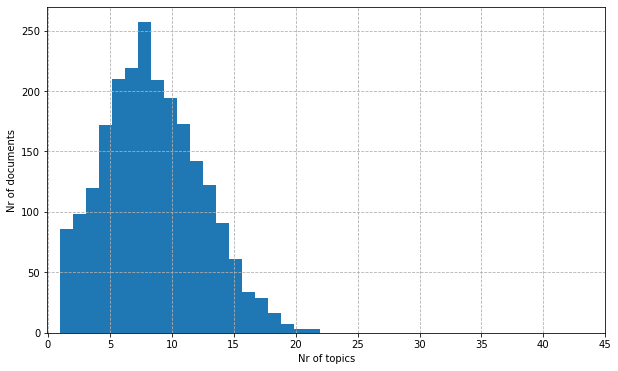

In [17]:
num_topics_used = [len(model[doc]) for doc in corpus]
plt.figure(figsize = (10, 6))
plt.hist(num_topics_used, bins = 20)
plt.xlabel('Nr of topics')
plt.ylabel('Nr of documents')
plt.xticks(np.arange(0,50,5))
plt.yticks(np.arange(0,300,50))
plt.grid(True, linestyle = '--')
plt.show()

In [18]:
model2 = models.ldamodel.LdaModel(corpus, num_topics = 100, id2word = corpus.id2word, alpha = 1)

In [19]:
num_topics_used2 = [len(model2[doc]) for doc in corpus]

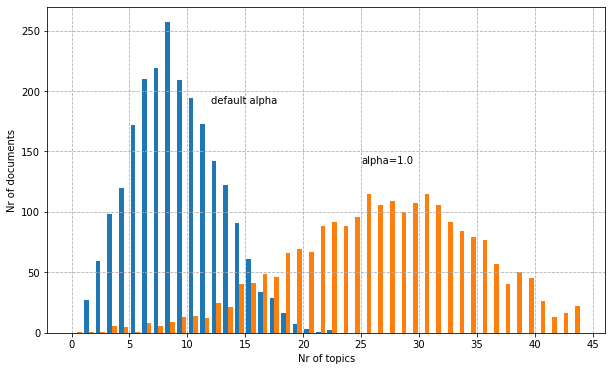

In [35]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.hist([num_topics_used, num_topics_used2], np.arange(45))

ax.text(12, 190, 'default alpha')
ax.text(25, 140, 'alpha=1.0')
plt.xticks(np.arange(0,50,5))
plt.yticks(np.arange(0,300,50))
plt.grid(True, linestyle = '--')
plt.xlabel('Nr of topics')
plt.ylabel('Nr of documents')
plt.show()

Displaying first 10 topics with the most highly weighted words

In [39]:
for i in range(10):
    topics = []
    words = model.show_topic(i, 10)
    for w,_ in words:
        topics.append(w)
    print(f"Topic - {i+1}: {', '.join(topics)}") 

Topic - 1: nam, fire, epstein, random, engulfed, police, awards, larry, books, book
Topic - 2: nordstrom, tender, settled, new, inc, cents, million, company, business, smith
Topic - 3: computer, genes, cell, new, test, noriega, gene, system, transmission, seton
Topic - 4: stalinist, state, government, new, two, officials, people, percent, last, party
Topic - 5: asylum, publisher, time, people, home, i, britains, report, government, genes
Topic - 6: ruby, hopkins, retailers, chains, theodore, percent, number, state, million, stores
Topic - 7: air, langley, fa, i, force, contributions, house, plane, two, base
Topic - 8: mecham, police, state, milstead, victims, law, group, first, people, last
Topic - 9: gravley, greyhound, discussing, allen, new, group, people, louisville, inc, employees
Topic - 10: orders, percent, dollar, bank, yen, market, million, canadian, tokyo, london


# Comparing documents by topics

In [49]:
from gensim import matutils

In [50]:
topics = matutils.corpus2dense(model[corpus], num_terms = model.num_topics)

In [51]:
from scipy.spatial import distance

In [52]:
pairwise = distance.squareform(distance.pdist(topics))
pairwise.shape

(100, 100)

In [53]:
largest = pairwise.max()
for ti in range(len(topics)):
    pairwise[ti, ti] = largest + 1

In [58]:
def closest_to(doc_id):
    return pairwise[doc_id].argmin()

In [61]:
closest_to(1)

52

## Modeling the whole of Wikipedia

In [77]:
!wget http://dumps.wikimedia.org/enwiki/latest/enwiki-latest-pages-articles.xml.bz2

"--2021-04-10 06:00:03--  http://dumps.wikimedia.org/enwiki/latest/enwiki-latest-pages-articles.xml.bz2  Resolving dumps.wikimedia.org (dumps.wikimedia.org)... 208.80.154.7, 2620:0:861:1:208:80:154:7 Connecting to dumps.wikimedia.org (dumps.wikimedia.org)|208.80.154.7|:80... connected. HTTP request sent, awaiting response... 301 Moved Permanently Location: https://dumps.wikimedia.org/enwiki/latest/enwiki-latest-pages-articles.xml.bz2 [following] --2021-04-10 06:00:04--  https://dumps.wikimedia.org/enwiki/latest/enwiki-latest-pages-articles.xml.bz2 Connecting to dumps.wikimedia.org (dumps.wikimedia.org)|208.80.154.7|:443... connected. HTTP request sent, awaiting response... 200 OK Length: 18416049294 (17G) [application/octet-stream] Saving to: `enwiki-latest-pages-articles.xml.bz2'\n  \n  enwiki-latest-pages 100%[===================>]  17.15G  4.75MB/s    in 64m 30s \n \n  2021-04-10 07:04:34 (4.54 MB/s) - `enwiki-latest-pages-articles.xml.bz2' saved [18416049294/18416049294] "


In [78]:
!python -m gensim.scripts.make_wiki enwiki-latest-pages-articles.xml.bz2 /content/wiki_en_output

In [79]:
import logging, gensim

In [80]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',
                    level=logging.INFO)

In [81]:
id2word = gensim.corpora.Dictionary.load_from_text('wiki_en_output_wordids.txt')
mm = gensim.corpora.MmCorpus('wiki_en_output_tfidf.mm')

In [83]:
model = gensim.models.ldamodel.LdaModel(corpus=mm,
                                           id2word=id2word,
                                           num_topics=100,
                                           update_every=1,
                                           chunksize=10000,
                                           passes=1)

In [84]:
model.save('wiki_lda.pkl')

2021-04-10 19:16:24,454 : INFO : saving LdaState object under wiki_lda.pkl.state, separately None
2021-04-10 19:16:24,499 : INFO : saved wiki_lda.pkl.state
2021-04-10 19:16:24,504 : INFO : saving LdaModel object under wiki_lda.pkl, separately ['expElogbeta', 'sstats']
2021-04-10 19:16:24,505 : INFO : storing np array 'expElogbeta' to wiki_lda.pkl.expElogbeta.npy
2021-04-10 19:16:24,511 : INFO : not storing attribute id2word
2021-04-10 19:16:24,512 : INFO : not storing attribute dispatcher
2021-04-10 19:16:24,515 : INFO : not storing attribute state
2021-04-10 19:16:24,518 : INFO : saved wiki_lda.pkl


In [85]:
model = gensim.models.ldamodel.LdaModel.load('wiki_lda.pkl')

2021-04-10 19:16:27,996 : INFO : loading LdaModel object from wiki_lda.pkl
2021-04-10 19:16:28,010 : INFO : loading expElogbeta from wiki_lda.pkl.expElogbeta.npy with mmap=None
2021-04-10 19:16:28,026 : INFO : setting ignored attribute id2word to None
2021-04-10 19:16:28,027 : INFO : setting ignored attribute dispatcher to None
2021-04-10 19:16:28,028 : INFO : setting ignored attribute state to None
2021-04-10 19:16:28,029 : INFO : loaded wiki_lda.pkl
2021-04-10 19:16:28,030 : INFO : loading LdaState object from wiki_lda.pkl.state
2021-04-10 19:16:28,070 : INFO : loaded wiki_lda.pkl.state


In [96]:
topics = matutils.corpus2dense(model[corpus],
                               num_terms=model.num_topics)

In [97]:
lens = (topics > 0).sum(axis=0)
print("Mean number of topics mentioned: ", np.mean(lens))

Mean number of topics mentioned:  8.640694568121104


In [98]:
print("Percentage of articles mentioning less than 10 topics: ",np.mean(lens <= 10))

Percentage of articles mentioning less than 10 topics:  0.6967943009795191


In [99]:
weights = topics.sum(axis = 0)

In [100]:
words = model.show_topic(weights.argmax(), 64)

In [102]:
fraction_mention = np.mean(topics[:,weights.argmax()] > 0)
print("The most mentioned topics is mentioned in {:.1%} of documents.".format(fraction_mention))
total_weight = np.mean(topics[:,weights.argmax()])
print("It represents {:.1%} of the total number of words.".format(total_weight))
print()
print()
# Retrieve the **least** heavily used topic and plot it as a word cloud:
words = model.show_topic(weights.argmin(), 64)
fraction_mention = np.mean(topics[:,weights.argmin()] > 0)
print("The least mentioned topics is mentioned in {:.1%} of documents.".format(fraction_mention))
total_weight = np.mean(topics[:,weights.argmin()])
print("It represents {:.1%} of the total number of words.".format(total_weight))
print()
print()

The most mentioned topics is mentioned in 16.9% of documents.
It represents 5.8% of the total number of words.


The least mentioned topics is mentioned in 2.4% of documents.
It represents 0.1% of the total number of words.


